In [ ]:
'''

任务三  

决策树算法梳理  
学习内容  
1 信息论基础（熵 联合熵 条件熵 信息增益 基尼不纯度）。  
2 决策树的不同分类算法（ID3算法、C4.5、CART分类树）的原理及应用场景  
3 回归树原理  
4 决策树防止过拟合手段  
5 模型评估  
6 sklearn参数详解，Python绘制决策树  
(markdown模式换行方法：连续两个空格+回车)  
'''


In [ ]:
'''
1. 信息论基础（熵 联合熵 条件熵 信息增益 基尼不纯度）  
  
熵Entropy:表示随机变量的不确定性.物理学中表示对事物的混乱程度的度量，熵值趋高越有秩序，反之越低越混乱无序  
H(x) = E[I(xi)] = E[ log(2,1/p(xi)) ] = -∑p(xi)log(2,p(xi)) (i=1,2,..n)  
H(x)表示熵值，x是随机变量，p(xi)表示第i个x发生的概率值。  
变量不确定性越大，即可能性越多，越混乱无序，熵越大。  
  
联合熵：度量一个联合分布的随机系统的不确定度，比如有两个随机变量X,Y.  物理含义是观察一个多随机变量的随机系统的信息量。  
H(X,Y) = H(X)+H(Y∣X)    

条件熵：上式右半部分H(Y∣X)即条件熵，物理含义是：在得知某一确定信息的基础上，获取另外一个信息时所获得的信息量。  
随机变量X在给定条件下随机变量Y的条件熵，对定义描述为：X给定条件下Y的条件干率分布的熵对X的数学期望。  
条件熵是用来解释信息增益而引入的概念。  
对一个两个随机变量的随机系统，我们可以先观察一个随机变量获取信息量，观察完后，我们可以在拥有这个信息量的基础上观察第二个随机变量的信息量。  
  
参考：https://www.cnblogs.com/fantasy01/p/4581803.html  


信息增益：通俗理解就是熵的变化，差值算出来就是信息增益。信息增益在决策树算法中是用来选择特征的指标，信息增益越大，则这个特征的选择性越好。在概率中定义为：待分类的集合的熵和选定某个特征的条件熵之差。  

基尼不纯度Gini: 指将来自集合中的某种结果随机应用在集合中，某一数据项的预期误差率。 可以理解为一个随机事件变成它的对立事件的概率。  
Gini(p) =  1- 概率的平方（越确定的越纯的可能性越大的概率越接近1，1-1 此值 Gini系数 越接近0，越纯，也就是不纯度越低）  
也就是Gini系数越小越好。和熵的概念差不多。  
'''

In [ ]:
'''

2.决策树的不同分类算法（ID3算法、C4.5、CART分类树）的原理及应用场景   

ID3算法：即信息增益算法，通过比较熵值变化，变化越大的决策越优先。  
应用场景：决策树是通过一系列规则对数据进行分类的过程。ID3是最常用的一种指标，用于选择一个最适合的特征做切分树条件。
ID3算法只能处理离散型的描述性属性。

C4.5：即信息增益率，考虑了自身的信息增益，中和考虑。比如一个数据集中的ID，决策选节点时用ID3算得的信息增益值很高（每个值都分为单个叶子节点，变化多，熵高，与之前的熵之差大），应该是最优选，但它是没有意义的，所以除以它自身的熵值（自身是各个不同，无重复id，熵值高），信息增益率的引入就是这样一个中和的目的。  
应用场景：C4.5是针对解决ID3出现的，适用于，当一个特征的可取值较多时， 每个可取值的样本数不多，很少，信息增益非常高。这时需考虑中和自身熵，适合用C4.5信息增益率。
C4．5算法是ID3算法的后续算法，它能够处理连续型数据。

CART：用基尼系数（基尼不纯度）来当做衡量标准，来度量自变量的不确定性。  
CART算法是一种通过计算Diversity(整体)-diversity(左节点)-diversity(右节点)的值取最佳分割的算法。  
应用场景：CART算法用Gini系数选择变量的不纯性度量。如果目标变量是标称的，并且是具有两个以上的类别，则CART可能考虑将目标类别合并成两个超类别（双化）。
'''

In [ ]:
'''
3 回归树原理  

分类数与回归树比较：  

上面的决策树目标变量（即输出结果）为分类型数值，叫分类决策树。  
目标变量为连续型数值时的决策树叫回归决策树。  
前者用于分类，如晴天/阴天/雨天、用户性别、邮件是否是垃圾邮件，后者用于预测实数值，如明天的温度、用户的年龄等。    

   
回归树原理：  

是通过把连续数值离散化（即把连续型属性的值分成不同的区间），是遍历数值，找到一个合适的（衡量标准同分类树，ID3,C4.5,CART都可以用？）阈值，做为切分树条件。
'''

In [ ]:

'''

4 决策树防止过拟合手段  

决策树过拟合的风险很大。
可以通过剪枝（预剪枝和后剪枝）控制树的深度和广度，  
即，选取特征时，控制决策树的参数，即达到一定阈值停止分裂：  
参数包括：树的深度（几层），叶子节点数，叶节点所含样本数，信息增益等。  
'''

In [ ]:
'''
5 模型评估  

sklearn中可以用：  
回归结果.score(X_test,y_test)来算分值评估。 

评估模型可以用：  
自助法（bootstrap）
准确度的区间估计  

也可用其它线性回归逻辑回归的评估方法：  

#MSE评估指标 均方误差  
skl_MSE = metrics.mean_squared_error(y_test,y_pred)  
#RMSE评估指标 均方根误差  
skl_RMSE = np.sqrt(skl_MSE)  
#算MAE平均绝对值误差 #单词absolute，绝对的  
skl_MAE = metrics.mean_absolute_error(y_test,y_pred)  
#算R^2  
skl_R2 = metrics.r2_score(y_test,y_pred)  

公式如下：  

#手算R方，MSE  
hand_MSE=np.sum(np.power((y_test.values.reshape(-1,1) - y_pred),2))/len(y_test.values)  
#均方误差公式：y真实值与预测值之差（误差）平方（方）和再求平均（均）  
#手算RMSE  
hand_RMSE = np.sqrt(hand_MSE)  
R2=1-hand_MSE/np.var(y_test.values)#代入【R方公式】,R方越大表示右半部损失越小，表示模型越好  
#算MAE平均绝对值误差  
hand_MAE=np.sum(np.abs((y_test.values.reshape(-1,1) - y_pred)))/len(y_test.values)
'''

In [1]:
#6 sklearn参数详解，Python绘制决策树

#参数：
#注意max_depth树深度和
#min_samples_split内部节点再划分所需最小样本数：
#限制了子树继续划分的条件，如果某节点的样本数少于min_samples_split，则不会再分。 默认是2.如果样本量不大，不需要管这个值。
#其它默认就好，不常改。
#详细参考http://www.cnblogs.com/pinard/p/6056319.html


In [2]:
#6 ===Python绘制决策树===
#准备条件：
'''
1、
安装一个画决定树可视化显示的工具graphviz-2.38.msi
下载地址https://graphviz.gitlab.io/download/
Windows 点开stable2.38 Windows install packages
下载.msi版，安装，注意安装路径，需把bin目录加到环境变量里。

2、
#还需安装pydotplus python的模块，用于把树对象展示画出来，画节点相关模块。
#pip install pydotplus安装即可

'''
#引库
from sklearn import tree
from sklearn.datasets.california_housing import fetch_california_housing
#用sklearn内置数据
import pydotplus
from IPython.display import Image



In [3]:
#下载内置数据
hsDatas = fetch_california_housing()
print(hsDatas.data[:,[6,7]])#打印树数据特征第6列到第7列，经纬度
print(hsDatas.target)#打印输入结果房价

[[  37.88 -122.23]
 [  37.86 -122.22]
 [  37.85 -122.24]
 ...
 [  39.43 -121.22]
 [  39.43 -121.32]
 [  39.37 -121.24]]
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [4]:
#以下用6，7列构建一个简单的决策树

#实例化决策树对象
dtree = tree.DecisionTreeRegressor(max_depth=2)#参数，树深度2，即两层
#训练数据
dtree.fit(hsDatas.data[:,[6,7]],hsDatas.target)
#【注意：X为所有特征样本的6到7列，y为房价结果标签。
#X这样取出就完事了。传的是数组数，不必再转回
#dataFrame，再转回来了。】



DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [5]:
#上面打印可看到全部参数，注意max_depth数深度和
#min_samples_split内部节点再划分所需最小样本数：
#限制了子树继续划分的条件，如果某节点的样本数少于min_samples_split，则不会再分。 默认是2.如果样本量不大，不需要管这个值。
#其它默认就好，不常改。

In [9]:
#封装graphviz树对象
dot_data_gv = tree.export_graphviz(
    dtree,
    out_file = None,
    feature_names = hsDatas.feature_names[6:8],
    filled = True,
    impurity = False,
    rounded = True
)
#参数：dtree为上面训练后的数据，feature_names 选需要的特征，6，7列（[]左取右不取），其它默认就好

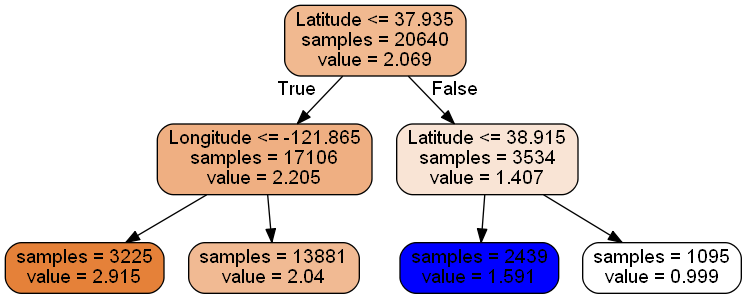

In [10]:
#python将上面封装的树对象展示出来

#实例化一个pydotplus画节点展示对象
graphPy = pydotplus.graph_from_dot_data(dot_data_gv)
graphPy.get_nodes()[7].set_fillcolor("blue")
#改某节点或线的颜色，[1]为线节点颜色，[2]为第1个叶子颜色，7为第6个叶子颜色

#画图
Image(graphPy.create_png())


In [11]:
#graphPy.write_png('dtree.png')#图存到本地

In [ ]:
#观察树叶上的信息：包含了特征，切分阈值，样本数，当前值Gini或熵
